In [1]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

The Equations for this problem are;

$\frac{\partial u}{\partial t} = D_u \bigtriangledown^2u - uv^2 + F(1-u) $

$\frac{\partial v}{\partial t} = D_v \bigtriangledown^2v - uv^2 + (F+K)v$

$\bigtriangledown^2u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}$



In [2]:
uvinitial = numpy.load('./uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']
numpy.shape(U)

(192, 192)

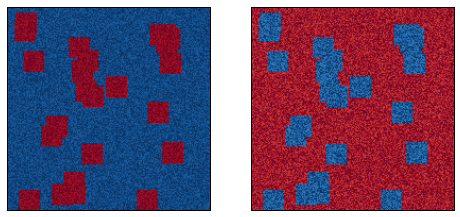

In [3]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

In [4]:
#Given
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5/(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)
print(dt)
print(nt)

0.9636865765741071
8301


In [5]:
def ftcs(T,Du,Dv,F,k,dt,nt,dh,U, V, ngrid):
    
    Ui = numpy.zeros((nt,ngrid,ngrid),dtype=float)
    Vi = numpy.zeros((nt,ngrid,ngrid),dtype=float)
    
    un = U.copy()#numpy.zeros((ngrid,ngrid),dtype=float)
    vn = V.copy()#numpy.zeros((ngrid,ngrid),dtype=float)
    
    for n in range(nt):
          
        
        Ui[n,1:-1,1:-1] = un[1:-1,1:-1] +dt*(Du*(un[:-2,1:-1]+un[2:,1:-1]-2*un[1:-1,1:-1])/(dh*dh)+\
                    Du*(un[1:-1,:-2]+un[1:-1,2:]-2*un[1:-1,1:-1])/(dh*dh)-un[1:-1,1:-1]*vn[1:-1,1:-1]*vn[1:-1,1:-1]+\
                    +F*(1-un[1:-1,1:-1]))
            
        Vi[n,1:-1,1:-1] = vn[1:-1,1:-1]+ dt*(Dv*(vn[:-2,1:-1]+vn[2:,1:-1]-2*(vn[1:-1,1:-1]))/(dh*dh)+\
                Dv*(vn[1:-1,:-2]+vn[1:-1,2:]-2*vn[1:-1,1:-1])/(dh*dh)+un[1:-1,1:-1]*vn[1:-1,1:-1]*vn[1:-1,1:-1]+\
                -(F+k)*(vn[1:-1,1:-1]))
           
          
            
        # Boundary conditions
        
        Ui[n,0,:]=Ui[n,1,:]
        Ui[n,-1,:]=Ui[n,-2,:]
        Ui[n,:,0]=Ui[n,:,1]
        Ui[n,:,-1]=Ui[n,:,-2]
        
        Vi[n,0,:]=Vi[n,1,:]
        Vi[n,-1,:]=Vi[n,-2,:]
        Vi[n,:,0]=Vi[n,:,1]
        Vi[n,:,-1]=Vi[n,:,-2]
        
        un = Ui[n].copy()
        vn = Vi[n].copy()
        
    return Ui,Vi    
    

In [6]:
Ut,Vt = ftcs(T, Du, Dv, F, k, dt, nt, dh, U, V, n)
print (numpy.round(Ut[-1,100,::40],4))

[ 0.9247  0.8501  0.6682  0.902   0.904 ]


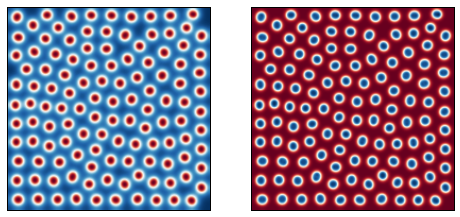

In [13]:
fig = pyplot.figure(figsize=(8,6))
pyplot.subplot(121)
pyplot.imshow(Ut[8000,:,:], cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(Vt[8000,:,:], cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

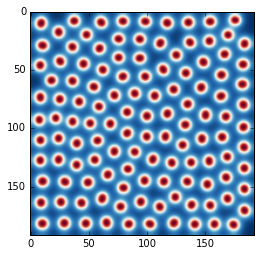

In [14]:
im = pyplot.imshow(Ut[8000,:,:], cmap = cm.RdBu)

In [18]:
def init():
    im.set_data(Ut[0,:,:])
    return im,

def animate(data):
    im.set_array(data)
    return im,

In [19]:
anim= animation.FuncAnimation(fig, animate, init_func=init, frames=Ut, interval=1)

In [20]:
HTML(anim.to_html5_video())